# Singular Value Decomposition

## (SVD)

[SVD](https://en.wikipedia.org/wiki/Singular_value_decomposition) is a generalization of eigenvalue decomposition of
non-square matrices. SVD decomposes (*n*⁢ x *m*) transformation matrix $\mathbf{X}$ into three simple transforms:

* rotation ($\mathbf{V}^T$)

* scaling ($\mathbf{\Lambda}^{1/2}$)

* rotation  ($\mathbf{U}^T$)

SVD decomposition of X:

  $$\mathbf{X}= \mathbf{U}\mathbf{\Lambda}^{1/2}\mathbf{V}^T$$

visualization:

<img src="svd1.png" width="480">

## Relation of SVD with eigendecomposition

Any symmetric matrix $\mathbf{A}$ can be decomposed with an orthogonal matrix $\mathbf{U}$ ($\mathbf{U}^T\mathbf{U}=\mathbf{E}$, $\mathbf{E}$ identity matrix) and a diagonal matrix $\mathbf{\Lambda}$ of eigenvalues:

  $$\mathbf{A}= \mathbf{U}\mathbf{\Lambda}\mathbf{U}^T$$

There are two ways to cretate a symmetric matrix from an *arbitrary* (*n*⁢ x *m*) matrix $\mathbf{X}$ (one is (*m*⁢ x *m*), the other is (*n*⁢ x *n*)): $\mathbf{X}^T \mathbf{X}$ or $\mathbf{X} \mathbf{X}^T$. These *symmetric* matrices can be decomposed with *identical* eigenvalues:

 $$\mathbf{X}^T \mathbf{X}=\mathbf{V}\mathbf{\Lambda}\mathbf{V}^T=(\mathbf{V}\mathbf{\Lambda}^{1/2}\mathbf{U}^T)(\mathbf{U}\mathbf{\Lambda}^{1/2}\mathbf{V}^T)$$

and

 $$\mathbf{X} \mathbf{X}^T=\mathbf{U}\mathbf{\Lambda}\mathbf{U}^T=(\mathbf{U}\mathbf{\Lambda}^{1/2}\mathbf{V}^T)(\mathbf{V}\mathbf{\Lambda}^{1/2}\mathbf{U}^T)$$

therefore any rank *r* matrix $\mathbf{X}$ has decomposition with orthogonal matrices  $\mathbf{U}$ and  $\mathbf{V}$ and with a diagonal matrix $\mathbf{\Lambda}^{1/2}$ of singular values:

 $$\mathbf{X}= \mathbf{U}\mathbf{\Lambda}^{1/2}\mathbf{V}^T$$ 

where

 $$\mathbf{\Lambda}^{1/2}=\begin{bmatrix}\sqrt{\lambda_1} & \cdots  & 0\\ \vdots  & \ddots & \vdots \\ 0 & \cdots  & \sqrt{\lambda_r}\end{bmatrix}$$

and *r* is *rank* of matrix $\mathbf{X}$.


### Example

Let

$$\mathbf{X} = \begin{bmatrix} 1 & 2\\ 2 & 1\\ 1 & 3 \end{bmatrix}$$ 

Find eigenvalues of matrix  $\mathbf{X} \mathbf{X}^T$, then calculate $\mathbf{\Lambda}^{1/2}$, SVD decomposition of matrix $\mathbf{X}$ and eigenvectors $\mathbf{V}_1$, $\mathbf{V}_2$. Then find $\mathbf{U}$ from formula and best rank-1 approximation $\mathbf{X}_1$ of matrix $\mathbf{X}$ (further discussion of this topic follows later).

<u>Solution</u> (Python, NumPy [`eig`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) )

In [1]:
import numpy as np
from numpy import linalg as LA
X = np.array([[1,2],[2,1],[1,3]])
# eigendecomposition of X'.X
e,V = LA.eig(np.dot(X.T,X))
Lam = np.sqrt(np.diag(e))
# singular values
np.diag(Lam)
U = np.dot(X,V)/np.sqrt(e)
# this is the original matrix X:
np.dot(U,np.dot(Lam,V.T))

array([[1., 2.],
       [2., 1.],
       [1., 3.]])

In [2]:
# best rank-1 approximation of X
X1 = np.sqrt(e[1])*np.outer(U[:,1],V[:,1].T)
# residuals:
X1 - X

array([[ 0.12017367, -0.06973949],
       [-1.06201737,  0.61631261],
       [ 0.55429524, -0.32167002]])

SVD decomposition with the dedicated NumPy function [numpy.linalg.svd](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html).

In [3]:
# SVD decomposition of X with dedicated function
U,S,V = LA.svd(X)
# singular values ordered by magnitude
S

array([4.2499715 , 1.39202811])

## Two SVD variants

<img src="svd2.png" width="400" >

## Properties of SVD

The two systems of eigenvectors are not independent:

$$\mathbf{U}_m=\frac{1}{\sqrt{\lambda_m}}\mathbf{X}\mathbf{V}_m \;\;\;\;\;m=1,...,r.$$

SVD produces best rank *k* approximation of $\mathbf{X}$:

$$\mathbf{X}_k=\sum_{m=1}^{k}\sqrt{\lambda_m}\mathbf{U}_m\mathbf{V}_m^T \;\;\;\;\;k\le r,$$

approximation error:

$$\varepsilon_k^2=\sum_{m,n}\left | x(m,n)-x_k(m,n)\right |^2$$   sum of eigenvalues not considered: $$\varepsilon_k^2=\sum_{m=k+1}^r \lambda_m$$

## Matrix expansion and spectrum

*k*-term expansion of matrix $\mathbf{X}$

$$\mathbf{X}_k=\sum_{m=1}^{k}\sqrt{\lambda_m}\mathbf{U}_m\mathbf{V}_m^T \;\;\;\;\;k\le r,$$

*spectrum* of matrix is defined as the set of the singular values $\sqrt{\lambda_m}$ (*m*=1, … , *r* ).

## Pseudoinverse

For any non-square matrix $\mathbf{X}$ there is a pseudoinverse $\mathbf{X}^+$:

 $$\mathbf{X}^+= \mathbf{V}\mathbf{\Lambda}^{1/2+}\mathbf{U}^T$$ 

where

 $${\mathbf{\Lambda}^{1/2+}\atop{(m,m)}} = \begin{bmatrix}\lambda_1^{-1/2} & \cdots  & 0 & \cdots  & 0\\ \vdots  & \ddots & \vdots & & \vdots\\ 0 & \cdots  & \lambda_r^{-1/2} & \cdots  & 0\\ \vdots &    & \vdots &   \ddots   & \vdots \\ 0 & \cdots  & 0 & \cdots  & 0\end{bmatrix}$$ .

Along the main diagonal of matrix $\mathbf{\Lambda}^{1/2+}$ all terms with index greater than *r* are zero.

## Solution of least squares problem with SVD

Minimize the following error norm:

$$\left \| \mathbf{A}\mathbf{x}-\mathbf{y} \right \|$$ 

Least squares (LSQ) solution $\mathbf{x}$ is calculated from the pseudoinverse obtained by SVD of matrix $\mathbf{A}$:

$$\mathbf{x}= \mathbf{V}\mathbf{\Lambda}^{1/2+}\mathbf{U}^T \mathbf{y}$$ .

## Solution of weighted least squares problem with SVD

Let us minimize the following error norm:

$$ (\mathbf{A}\mathbf{x}-\mathbf{y})^T \mathbf{P}  (\mathbf{A}\mathbf{x}-\mathbf{y})$$ 

Least squares (LSQ) solution $\mathbf{x}$ can be obtained with SVD decomposition of matrix $\mathbf{P}_0\mathbf{A}$  ($\mathbf{P}_0\mathbf{A}= \mathbf{U}\mathbf{\Lambda}^{1/2}\mathbf{V}^T$), from which we calculate pseudoinverse, where $\mathbf{P}_0$ is the square root of matrix $\mathbf{P}$, $\mathbf{P}=\mathbf{P}_0^T\mathbf{P}_0$:

$$\mathbf{x}= \mathbf{V}\mathbf{\Lambda}^{1/2+}\mathbf{U}^T \mathbf{P}_0\mathbf{y}$$ .

## Matrix approximation with SVD

<u>Example: SVD approximation of the geoid in Hungary</u>

Read geoid heights:

In [4]:
geoid = np.loadtxt("geoid.txt")

grid of geoid heights, 35 rows, 70 columns

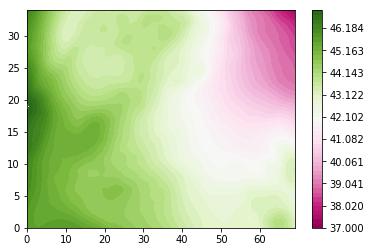

In [6]:
N = np.flipud(np.reshape(geoid[:,2],(35,70)))
import matplotlib.pyplot as plt
cmap = plt.get_cmap('PiYG')
levels=np.linspace(37,47)
plt.contourf(N,levels=levels,cmap=cmap)
plt.colorbar()
plt.show()

calculate SVD

In [8]:
U,S,V = LA.svd(N)
# decreasing order of singular values
print(S[0:10])
print(U.shape, V.shape)

[2.13748970e+03 3.01654946e+01 1.27873105e+01 4.23156000e+00
 3.37888239e+00 2.95186350e+00 1.90147820e+00 1.25895030e+00
 9.66044712e-01 8.79068869e-01]
(35, 35) (70, 70)


Matrix spectrum

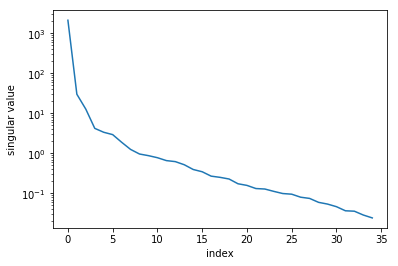

In [9]:
# rank of matrix
r = LA.matrix_rank(N)
plt.semilogy(range(r),S[:r])
plt.xlabel("index")
plt.ylabel("singular value")
plt.show()

Best SVD approximation of degree *n*, plotted with step size `step`

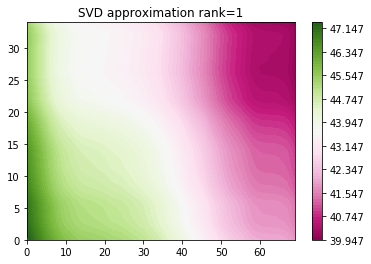

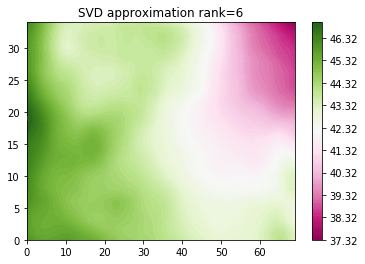

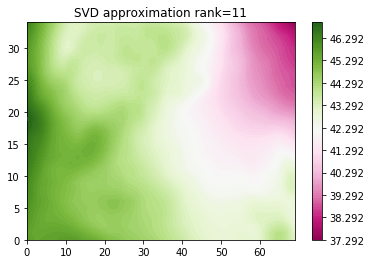

In [10]:
def svdapprox(U,S,V,k,n,step):
    dm = np.zeros((len(U),len(V)))
    for i in range(k,n):
        dm = dm + S[i]*np.outer(U.T[i],V[i])
        if np.mod(i,step) == 0:
            cmin = np.amin(dm)
            cmax = np.amax(dm)
            # print(cmin, cmax)
            levels=np.arange(cmin,cmax,step=0.1)
            plt.contourf(dm,levels=levels,cmap=cmap)
            plt.title("SVD approximation rank=%d" % (i+1))
            plt.colorbar()
            plt.show()
            # raw_input()
    return dm

Na = svdapprox(U,S,V,0,11,5)          

error of last approximation

min: -0.127  max: 0.123


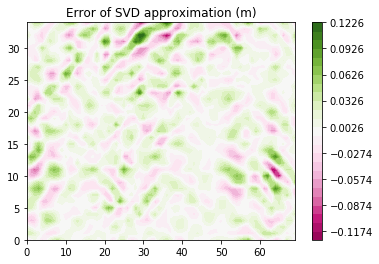

In [11]:
dN = N - Na
cmin = np.amin(dN)
cmax = np.amax(dN)
print("min: %.3f  max: %.3f" % (cmin, cmax))
levels=np.arange(cmin,cmax,step=0.01)
plt.contourf(dN,levels=levels,cmap=cmap)
plt.title("Error of SVD approximation (m)")
plt.colorbar()
plt.show()

### Exercise
Calculate approximation error from the neglected singular values!

In [ ]:
np.sqrt(np.sum(S[11:]**2)/(35*70-1))